FLIGHT DELAY PREDICTION

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
from collections import OrderedDict
from matplotlib.gridspec import GridSpec
%matplotlib inline

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [76]:
df=pd.read_csv('/content/drive/My Drive/Dataset/flight_data.csv')
planes = pd.read_csv("/content/drive/My Drive/Dataset/planes.csv")
airports = pd.read_csv("/content/drive/My Drive/Dataset/airports.csv")
carriers = pd.read_csv("/content/drive/My Drive/Dataset/carriers.csv")
df.head(15)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,date,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,01 January 2013,05:00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,01 January 2013,05:00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,01 January 2013,05:00:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,01 January 2013,05:00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,01 January 2013,06:00:00
5,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,1696,N39463,EWR,ORD,150.0,719,5,58,01 January 2013,05:00:00
6,2013,1,1,555.0,600,-5.0,913.0,854,19.0,B6,507,N516JB,EWR,FLL,158.0,1065,6,0,01 January 2013,06:00:00
7,2013,1,1,557.0,600,-3.0,709.0,723,-14.0,EV,5708,N829AS,LGA,IAD,53.0,229,6,0,01 January 2013,06:00:00
8,2013,1,1,557.0,600,-3.0,838.0,846,-8.0,B6,79,N593JB,JFK,MCO,140.0,944,6,0,01 January 2013,06:00:00
9,2013,1,1,558.0,600,-2.0,753.0,745,8.0,AA,301,N3ALAA,LGA,ORD,138.0,733,6,0,01 January 2013,06:00:00


In [7]:
df.shape

(9999, 20)

In [77]:
df.isnull().sum()

year               0
month              0
day                0
dep_time          58
sched_dep_time     0
dep_delay         58
arr_time          64
sched_arr_time     0
arr_delay         89
carrier            0
flight             0
tailnum           14
origin             0
dest               0
air_time          89
distance           0
hour               0
minute             0
date               0
time_hour          0
dtype: int64

In [78]:
df = df.dropna()

In [79]:
df.shape

(9910, 20)

In [80]:
df.isnull().sum()

year              0
month             0
day               0
dep_time          0
sched_dep_time    0
dep_delay         0
arr_time          0
sched_arr_time    0
arr_delay         0
carrier           0
flight            0
tailnum           0
origin            0
dest              0
air_time          0
distance          0
hour              0
minute            0
date              0
time_hour         0
dtype: int64

In [106]:
df.info()
carriers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9910 entries, 0 to 9998
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   year     9910 non-null   int64
 1   month    9910 non-null   int64
 2   day      9910 non-null   int64
 3   carrier  9910 non-null   int64
 4   origin   9910 non-null   int64
 5   dest     9910 non-null   int64
dtypes: int64(6)
memory usage: 542.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   IATA_CODE  17 non-null     int64
 1   AIRLINE    17 non-null     int64
dtypes: int64(2)
memory usage: 400.0 bytes


In [82]:
df['dep_time'] = df['dep_time'].astype('int64')
df['dep_delay'] = df['dep_delay'].astype('int64')
df['arr_time'] = df['arr_time'].astype('int64')
df['arr_delay'] = df['arr_delay'].astype('int64')

In [84]:
x=df.iloc[:,0:16].values
y=df.iloc[:,16:17].values
print(x.shape)
print(y)

(9910, 16)
[[ 5]
 [ 5]
 [ 5]
 ...
 [10]
 [10]
 [10]]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


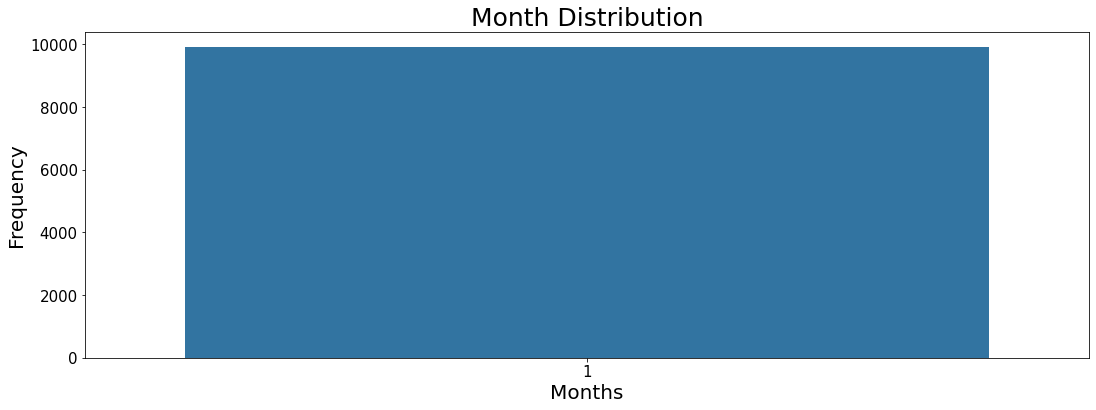

In [14]:
plt.figure(figsize = (18, 6))
sns.countplot(df['month'])
plt.title('Month Distribution', size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Months", size = 20)
plt.ylabel("Frequency", size = 20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


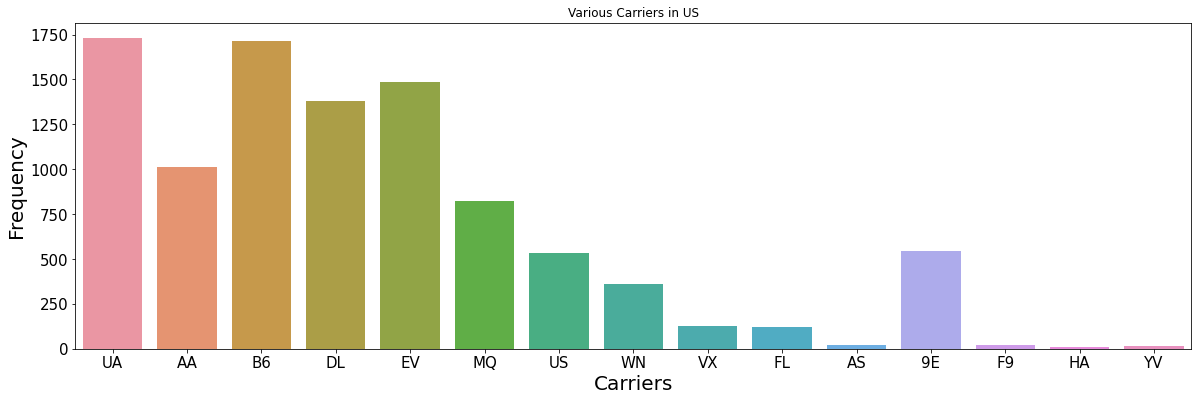

In [15]:
plt.figure(figsize = (20, 6))
sns.countplot(df['carrier'])
plt.title('Various Carriers in US')
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Carriers", size = 20)
plt.ylabel("Frequency", size = 20)
plt.show()

In [16]:
df['carrier'].value_counts().to_frame()

,carrier
UA,1730
B6,1717
EV,1484
DL,1382
AA,1012
MQ,824
9E,544
US,536
WN,361
VX,128


In [17]:
# function that extract statistical parameters from a grouby objet:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}
#_______________________________________________________________
# Creation of a dataframe with statitical infos on each airline:
global_stats = df['dep_delay'].groupby(df['carrier']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('count')
global_stats

,min,max,count,mean
carrier,,,,
HA,-5.0,1301.0,12.0,124.666667
YV,-11.0,89.0,14.0,2.000000
AS,-12.0,29.0,23.0,2.043478
F9,-14.0,123.0,23.0,7.521739
FL,-17.0,23.0,120.0,-4.191667
VX,-14.0,38.0,128.0,1.359375
WN,-9.0,241.0,361.0,4.191136
US,-14.0,102.0,536.0,-2.858209
9E,-18.0,291.0,544.0,8.534926


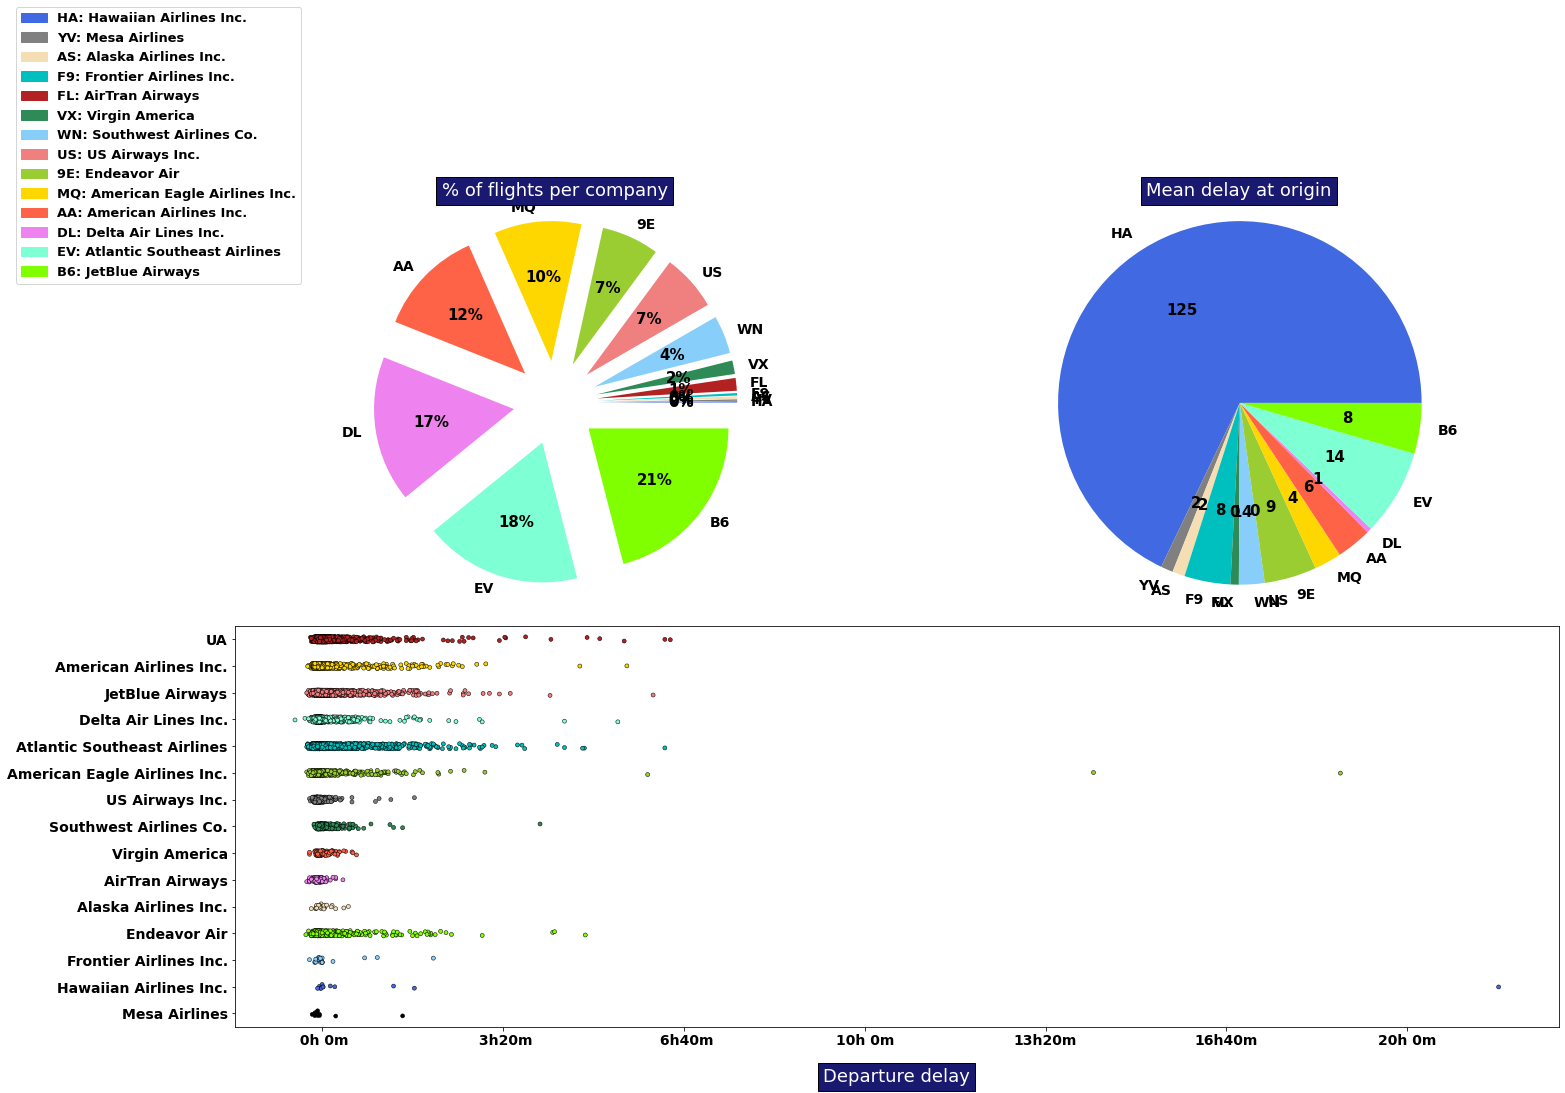

In [21]:
#___________________________________________
# graphs on flights, airports & delays
global_stats1 = global_stats
global_stats = global_stats1.head(14)
codes = global_stats.index.tolist()
carriers1 = carriers[carriers['IATA_CODE'].isin(codes)]
abbr_companies = carriers1.set_index('IATA_CODE')['AIRLINE'].to_dict()

font = {'family' : 'DejaVu Sans', 'weight' : 'bold', 'size'   : 15}
mpl.rc('font', **font)
import matplotlib.patches as mpatches
#__________________________________________________________________
# I extract a subset of columns and redefine the airlines labeling 
df2 = df.loc[:, ['carrier', 'dep_delay']]
df2['carrier'] = df2['carrier'].replace(abbr_companies)
#________________________________________________________________________
colors = ['royalblue', 'grey', 'wheat', 'c', 'firebrick', 'seagreen', 'lightskyblue',
          'lightcoral', 'yellowgreen', 'gold', 'tomato', 'violet', 'aquamarine', 'chartreuse']
#___________________________________
fig = plt.figure(1, figsize=(22,17))
gs=GridSpec(2,2)             
ax1=fig.add_subplot(gs[0,0]) 
ax2=fig.add_subplot(gs[0,1]) 
ax3=fig.add_subplot(gs[1,:]) 
#------------------------------
# Pie chart nº1: nb of flights
#------------------------------
labels = [s for s in  global_stats.index]
sizes  = global_stats['count'].values
explode = [0.3 if sizes[i] < 20000 else 0.0 for i in range(len(abbr_companies))]
patches, texts, autotexts = ax1.pie(sizes, explode = explode,
                                labels=labels, colors = colors,  autopct='%1.0f%%',
                                shadow=False, startangle=0)
for i in range(len(abbr_companies)): 
    texts[i].set_fontsize(14)
ax1.axis('equal')
ax1.set_title('% of flights per company', bbox={'facecolor':'midnightblue', 'pad':5},
              color = 'w',fontsize=18)
#_______________________________________________
# I set the legend: abreviation -> airline name
comp_handler = []
for i in range(len(abbr_companies)):
    comp_handler.append(mpatches.Patch(color=colors[i],
            label = global_stats.index[i] + ': ' + abbr_companies[global_stats.index[i]]))
ax1.legend(handles=comp_handler, bbox_to_anchor=(0.2, 0.9), 
           fontsize = 13, bbox_transform=plt.gcf().transFigure)
#----------------------------------------
# Pie chart nº2: mean delay at departure
#----------------------------------------
sizes  = global_stats['mean'].values
sizes  = [max(s,0) for s in sizes]
explode = [0.0 if sizes[i] < 20000 else 0.01 for i in range(len(abbr_companies))]
patches, texts, autotexts = ax2.pie(sizes, explode = explode, labels = labels,
                                colors = colors, shadow=False, startangle=0,
                                autopct = lambda p :  '{:.0f}'.format(p * sum(sizes) / 100))
for i in range(len(abbr_companies)): 
    texts[i].set_fontsize(14)
ax2.axis('equal')
ax2.set_title('Mean delay at origin', bbox={'facecolor':'midnightblue', 'pad':5},
              color='w', fontsize=18)
#------------------------------------------------------
# striplot with all the values reported for the delays
#___________________________________________________________________
# I redefine the colors for correspondance with the pie charts
codes = global_stats1.index.tolist()
carriers1 = carriers[carriers['IATA_CODE'].isin(codes)]
abbr_companies = carriers1.set_index('IATA_CODE')['AIRLINE'].to_dict()

colors = ['firebrick', 'gold', 'lightcoral', 'aquamarine', 'c', 'yellowgreen', 'grey',
          'seagreen', 'tomato', 'violet', 'wheat', 'chartreuse', 'lightskyblue', 'royalblue', 
          'black', 'grey', 'white', 'silver', 'black', 'pink']
#___________________________________________________________________
ax3 = sns.stripplot(y="carrier", x="dep_delay", size = 4, palette = colors,
                    data=df2, linewidth = 0.5,  jitter=True)
plt.setp(ax3.get_xticklabels(), fontsize=14)
plt.setp(ax3.get_yticklabels(), fontsize=14)
ax3.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])
                         for x in ax3.get_xticks()])
plt.xlabel('Departure delay', fontsize=18, bbox={'facecolor':'midnightblue', 'pad':5},
           color='w', labelpad=20)
ax3.yaxis.label.set_visible(False)
#________________________
plt.tight_layout(w_pad=3)


Text(0.5, 0, 'Mean delay [min] (@departure: blue, @arrival: hatch lines)')

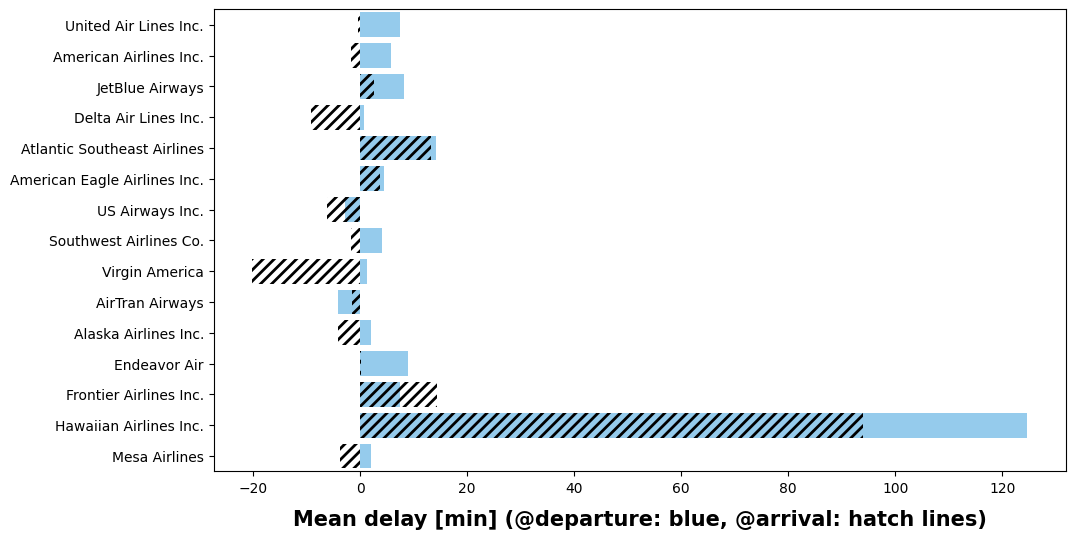

In [22]:
#plotting mean delays by airlines
carrier_code=carriers.set_index('IATA_CODE')['AIRLINE'].to_dict()
mpl.rc('patch', edgecolor = 'dimgray', linewidth = 1)
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['hatch.linewidth'] = 2.0

fig = plt.figure(1, figsize = (11, 6))
ax = sns.barplot(x = 'dep_delay', y = 'carrier', data = df, color = 'lightskyblue', ci = None)
ax = sns.barplot(x = 'arr_delay', y = 'carrier', data = df, color = 'r', hatch = '///', alpha = 0.0, ci = None)
labels = [carrier_code[item.get_text()] for item in ax.get_yticklabels()]
ax.set_yticklabels(labels)
ax.yaxis.label.set_visible(False)
plt.xlabel("Mean delay [min] (@departure: blue, @arrival: hatch lines)", fontsize = 15, weight = 'bold', labelpad = 10)

Text(0.5, 0, "5 Major Carrier's Mean Delay [min] (@departure: blue, @arrival: hatch lines)")

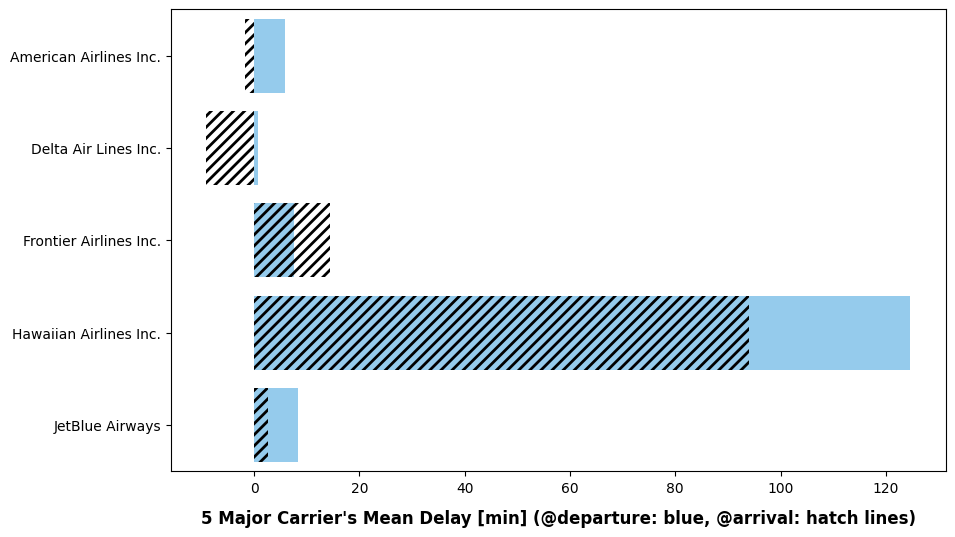

In [23]:
mpl.rc('patch', edgecolor = 'dimgray', linewidth = 1)
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['hatch.linewidth'] = 2.0

fig = plt.figure(1, figsize = (10, 6))

#Subset 4 major airlines
ax = sns.barplot(x = 'dep_delay', y = 'carrier', data = df, order = ['AA', 'DL', 'F9', 'HA', 'B6'], color = 'lightskyblue', ci = None)
ax = sns.barplot(x = 'arr_delay', y = 'carrier', data = df, order = ['AA', 'DL', 'F9', 'HA', 'B6'], color = 'r', hatch = '///', alpha = 0.0, ci = None)
labels = [carrier_code[item.get_text()] for item in ax.get_yticklabels()]
ax.set_yticklabels(labels)
ax.yaxis.label.set_visible(False)
plt.xlabel("5 Major Carrier's Mean Delay [min] (@departure: blue, @arrival: hatch lines)", fontsize = 12, weight = 'bold', labelpad = 10)

In [24]:
df['origin'].value_counts().to_frame()

,origin
EWR,3652
JFK,3442
LGA,2905


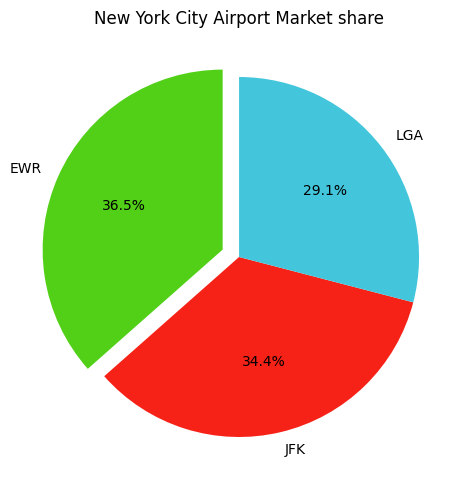

In [25]:
plt.pie(
    df['origin'].value_counts(),
    labels = df['origin'].value_counts().index,
    explode = (0.1, 0, 0),
    startangle = 90,
    autopct = '%1.1f%%',
    colors = ['#52D017', '#F62217', '#43C6DB']
)

plt.tight_layout()
plt.title("New York City Airport Market share")
plt.show()


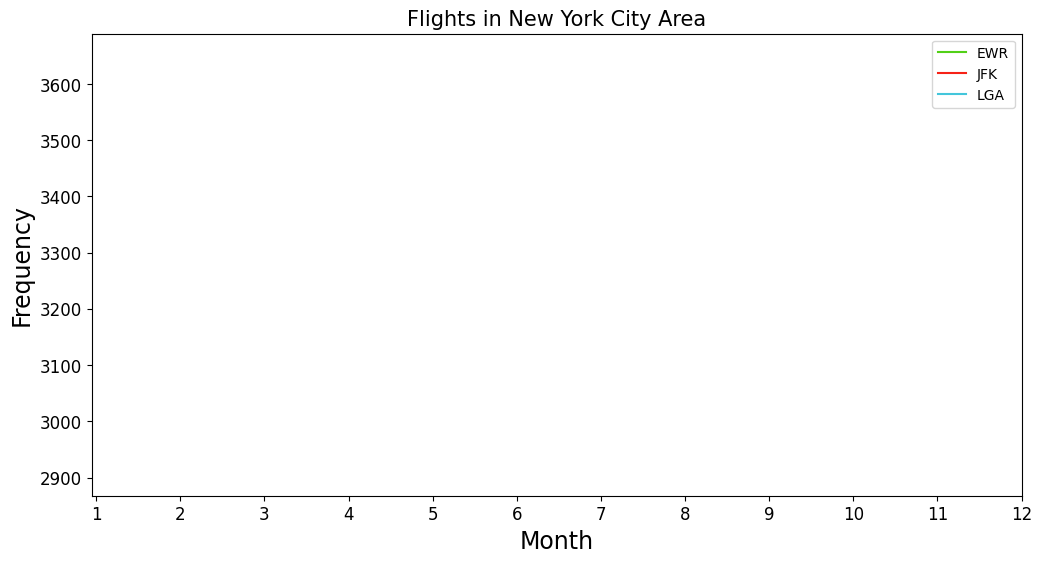

In [26]:
fig = plt.figure(1, figsize = (12, 6))
df[df['origin'] == 'EWR']['month'].value_counts().sort_index().plot(kind = 'line', color = '#52D017')
df[df['origin'] == 'JFK']['month'].value_counts().sort_index().plot(kind = 'line', color = '#F62217')
df[df['origin'] == 'LGA']['month'].value_counts().sort_index().plot(kind = 'line', color = '#43C6DB')

plt.title("Flights in New York City Area", size = 15)
plt.xticks(range(1, 13), size = 12)
plt.yticks(size = 12)
plt.xlabel("Month", size = 17)
plt.ylabel("Frequency", size = 17)
plt.legend(['EWR', 'JFK', 'LGA'])

In [27]:
def map_labels(delays):
    if delays > 45:
        return 1
    else:
        return 0

df['delayed'] = ((df['dep_delay'].map(map_labels) + df['arr_delay'].map(map_labels)) != 0).astype(int)
df['delayed'].value_counts(normalize = True)

0    0.932193
1    0.067807
Name: delayed, dtype: float64

In [86]:
columns_to_remove = ['dep_time', 'sched_dep_time', 'dep_delay', 'arr_time', 'sched_arr_time', 'arr_delay', 'flight', 'tailnum', 'air_time', 'distance', 'hour', 'minute', 'time_hour']
df.drop(columns_to_remove, axis = 1, inplace = True)

In [93]:
df=df.drop(['date'],axis=1)
df.head(10)

,year,month,day,carrier,origin,dest
0,2013,1,1,10,0,38
1,2013,1,1,10,2,38
2,2013,1,1,1,1,50
3,2013,1,1,3,1,8
4,2013,1,1,4,2,1
5,2013,1,1,10,0,60
6,2013,1,1,3,0,30
7,2013,1,1,5,2,37
8,2013,1,1,3,1,46
9,2013,1,1,1,2,60


In [89]:
df['dest'].value_counts().to_frame()

,dest
ATL,514
ORD,475
MCO,444
FLL,437
LAX,431
BOS,407
CLT,390
MIA,360
SFO,335
DTW,286


In [99]:
carriers.head(5)

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [105]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['dest']=le.fit_transform(df['dest'])
df['origin']=le.fit_transform(df['origin'])
df['carrier']=le.fit_transform(df['carrier'])
carriers['IATA_CODE']=le.fit_transform(carriers['IATA_CODE'])
carriers['AIRLINE']=le.fit_transform(carriers['AIRLINE'])
df.head(10)
carriers.head(5)

,IATA_CODE,AIRLINE
0,12,15
1,1,2
2,13,14
3,6,7
4,3,9


In [96]:
from sklearn.preprocessing import OneHotEncoder
oh=OneHotEncoder()
c=oh.fit_transform(x[:,3:4]).toarray()
o=oh.fit_transform(x[:,4:5]).toarray()
d=oh.fit_transform(x[:,5:6]).toarray()
df.head()

,year,month,day,carrier,origin,dest
0,2013,1,1,10,0,38
1,2013,1,1,10,2,38
2,2013,1,1,1,1,50
3,2013,1,1,3,1,8
4,2013,1,1,4,2,1


In [97]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(x_test.shape)
print(x_train.shape)
print(y_test.shape)
print(y_train.shape)

(1982, 16)
(7928, 16)
(1982, 1)
(7928, 1)


In [54]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [55]:
import imblearn
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [73]:
saving_data = df.to_csv("/content/drive/My Drive/FlightDelayProject/coding/Processed_data.csv", index = False)